### Downloading MNIST DATA

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [128]:
len(mnist['data'])

70000

### VISUALISATION

In [129]:
x,y = mnist['data'],mnist['target']

In [5]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [7]:
x[12345]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  49, 253, 193,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
y[12345]


1.0

In [9]:
x.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

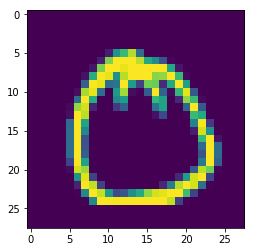

In [14]:
_ =x[1000]
_image = _.reshape(28,28)
plt.imshow(_image)

In [18]:
y[1000]

0.0

In [20]:
np.where(y==4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138], dtype=int64),)

In [ ]:
_ =x[24754]
_image = _.reshape(28,28)
plt.imshow(_image,cmap='gray')

### SPLITTING TRIAN AND TEST SPLIT

In [25]:
num_split = 60000
X_train,X_test,y_train,y_test = x[:num_split],x[num_split:],y[:num_split],y[num_split:]

### SHUFFLING THE DATASET

In [26]:


shuffle_index = np.random.permutation(num_split)

X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

### TRaining a Binary Classifier

To simplify our problem, we will make this an exercise of "Zero" or "non-Zero", making it a two class problem
we need to first convert our target to 0 & non zero

In [27]:
y_train_0 = (y_train == 0)

In [28]:
y_train_0

array([ True, False, False, ..., False, False, False])

In [29]:
y_test_0 = (y_test == 0)

In [30]:
y_test_0

array([ True,  True,  True, ..., False, False, False])

At this point we can pick any classifier and train it. this is iterative part of choosing and testing all the classifier and tuning the hyperparameters.

### SGD CLassifier
#### TRAINING

In [31]:
from sklearn.linear_model import SGDClassifier

In [33]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train,y_train_0)

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### PREDICTION

In [35]:
clf.predict(x[1000].reshape(1,-1))

array([ True])

### PERFORMANCE MEASURES
#### MEASURING ACCURACY USING CROSS-VALIDATION
##### STRATIFIED KFOLD

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [37]:
skfolds = StratifiedKFold(n_splits=3,random_state=100)

In [39]:
for train_index,test_index in skfolds.split(X_train,y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_fold = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold,y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    
    print("{0:.4f}".format(n_correct/len(y_pred)))

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9753


C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9878


C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9719


#### CROSS_VAL_SCORE USING K FOLD CROSS-VALIDATION

In [40]:
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(clf,X_train,y_train_0,cv=10,scoring='accuracy')

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\winuser\Anaconda3\l

array([0.99016831, 0.988002  , 0.98166972, 0.98816667, 0.98966667,
       0.98433333, 0.98516667, 0.99066511, 0.98033006, 0.98633106])

### Danger of Blindly Applying Evaluator As a Performance measure

Lets check againsts dumb classifier

In [45]:
1-sum(y_train_0) / len(y_train_0)

0.9012833333333333

A simple check shows that 90.1% of the images are non zero.Any time you guess the image is non zero, you will be right 90.1% of time. bare this in mind when you are dealing with skewed datasets.Because of this, accuracy is generally not the preffered performance measure for classifier

### CONFUSION MATRIX

In [49]:
from sklearn.model_selection import cross_val_predict

In [50]:
y_train_pred = cross_val_predict(clf,X_train,y_train_0,cv=3)

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\winuser\Anaconda3\l

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_train_0,y_train_pred)

array([[52947,  1130],
       [  169,  5754]], dtype=int64)

### PRECISION
precision actually measures accuracy of positive predictions.
precision = tp/tp+fp

In [53]:
from sklearn.metrics import classification_report,precision_score,recall_score

In [60]:
#classification_report(y_train_0,y_train_pred)

In [59]:
precision_score(y_train_0,y_train_pred)

0.835851249273678

### RECALL
Precision is usually used with recall(sensitivity).the ratio of positive instances that are correctly detected by the clasifier
Recall = tp/tp+fn

In [61]:
recall_score(y_train_0,y_train_pred)

0.9714671619111936

### F1 SCORE
f1 score is harmonic mean of precision and recall.regular mean gives equal weight too all values.harmonic mean gives more weight to low values
f1=2/(1/precision + 1/recall) =2 x precision*recall/precision+recall
= tp/tp +(fn+fp/2)

In [62]:
from sklearn.metrics import f1_score

In [63]:
f1_score(y_train_0,y_train_pred)

0.8985710939330054

### precision / Recall Tradeoff
increasing precision reduced recall and vice versa

In [64]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train,y_train_0)

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [65]:
y[1000]

0.0

In [67]:
y_scores = clf.decision_function(x[1000].reshape(1,-1))
y_scores

array([20497.41301123])

In [68]:
threshold = 0

In [69]:
y_some_digits_pred = (y_scores >threshold)

In [70]:
y_some_digits_pred

array([ True])

In [72]:
y_scores = cross_val_predict(clf,X_train,y_train_0,cv=3,method='decision_function')

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\winuser\Anaconda3\l

(array([1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 7.000e+00, 1.200e+01,
        1.200e+01, 1.500e+01, 1.400e+01, 3.400e+01, 3.300e+01, 3.100e+01,
        4.700e+01, 5.400e+01, 7.300e+01, 1.040e+02, 1.000e+02, 1.430e+02,
        1.560e+02, 1.690e+02, 2.080e+02, 2.700e+02, 3.210e+02, 3.370e+02,
        3.750e+02, 4.910e+02, 5.540e+02, 6.120e+02, 7.120e+02, 7.910e+02,
        9.690e+02, 1.053e+03, 1.213e+03, 1.288e+03, 1.442e+03, 1.588e+03,
        1.731e+03, 1.904e+03, 2.006e+03, 2.083e+03, 2.197e+03, 2.228e+03,
        2.342e+03, 2.341e+03, 2.289e+03, 2.328e+03, 2.357e+03, 2.317e+03,
        2.176e+03, 1.966e+03, 1.841e+03, 1.572e+03, 1.425e+03, 1.195e+03,
        1.000e+03, 8.300e+02, 6.780e+02, 5.260e+02, 4.530e+02, 3.260e+02,
        2.980e+02, 2.180e+02, 2.110e+02, 1.720e+02, 1.750e+02, 1.810e+02,
        1.860e+02, 2.140e+02, 2.640e+02, 2.890e+02, 3.150e+02, 3.340e+02,
        3.300e+02, 3.620e+02, 3.880e+0

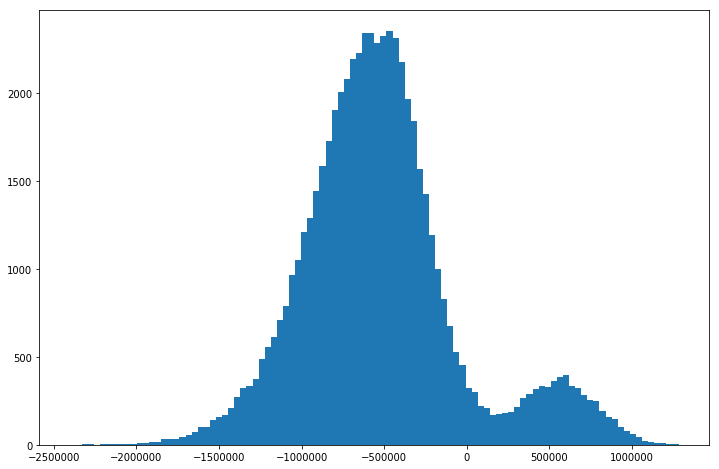

In [73]:
plt.figure(figsize=(12,8))
plt.hist(y_scores,bins=100)

In [74]:
from sklearn.metrics import precision_recall_curve

In [75]:
precisions,recalls, threshold = precision_recall_curve(y_train_0,y_scores)

In [76]:
def plot_precision_recall_vs_threshold (precisions, recalls, threshold):
    plt.plot(threshold,precisions[:-1],'b--',label='Precision')
    plt.plot(threshold,recalls[:-1],'g--',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([-0.5,1.5])

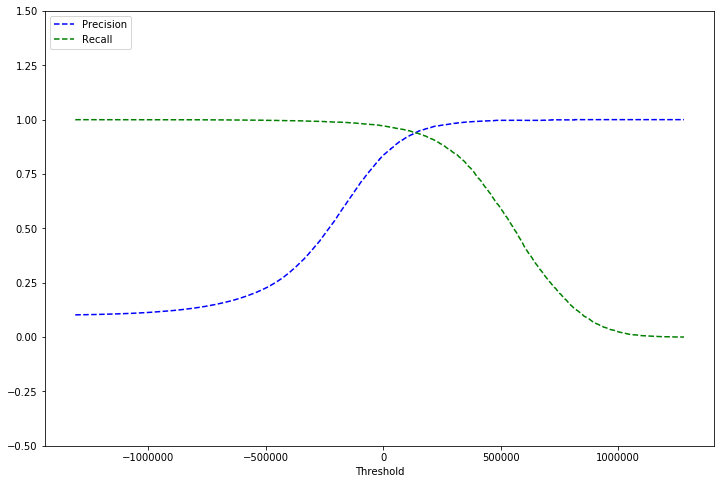

In [77]:
plt.figure(figsize=(12,8))
plot_precision_recall_vs_threshold(precisions,recalls,threshold)
plt.show()

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

***

One can also plot precisions against recalls to assist with the threshold selection

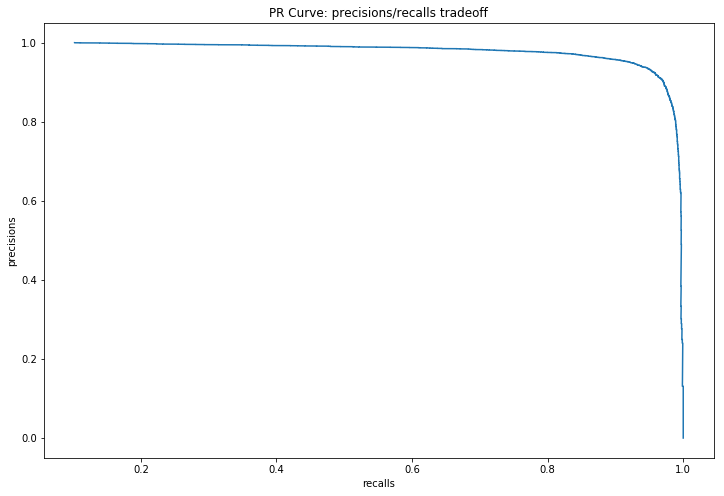

In [78]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

### SETTING HIGH PRECISION
lets aim for 90% precisions


In [79]:
len(precisions)

57982

In [80]:
len(threshold)

57981

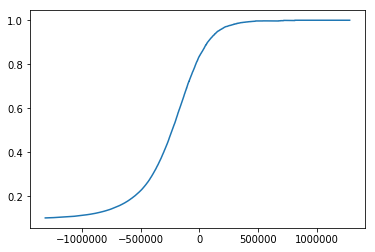

In [83]:
plt.plot(threshold,precisions[1:])

In [84]:
idx = len(precisions[precisions<0.9])

In [92]:
threshold[idx]

70988.88184536903

In [93]:
y_train_pred_90 = (y_scores>70988)

In [94]:
precision_score(y_train_0,y_train_pred_90)

0.9000158704967466

In [95]:
recall_score(y_train_0,y_train_pred_90)

0.9574539929089988

### SETTING HIGH PRECISION
lets aim for 99% precisions


In [96]:
idx = len(precisions[precisions<0.99])

In [97]:
threshold[idx]

367652.2008045547

In [98]:
y_train_pred_99 = (y_scores>367652)

In [99]:
precision_score(y_train_0,y_train_pred_99)

0.9901498929336189

In [100]:
recall_score(y_train_0,y_train_pred_99)

0.7806854634475773

### SETTING HIGH RECALL SCORE
Recall score > 0.9

In [101]:
idx = len(recalls[recalls>0.9])

In [102]:
threshold[idx]

226655.8382336448

In [103]:
y_train_pred_90 = (y_scores>threshold[idx])

In [104]:
recall_score(y_train_0,y_train_pred_90)

0.8997129832854972

In [105]:
precision_score(y_train_0,y_train_pred_90)

0.9710276967930029

## The Receiver Operating Characteristics (ROC) Curve

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

In [106]:
from sklearn.metrics import roc_curve

In [107]:
fpr,tpr, thresholds = roc_curve(y_train_0,y_scores)

In [108]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve')
               


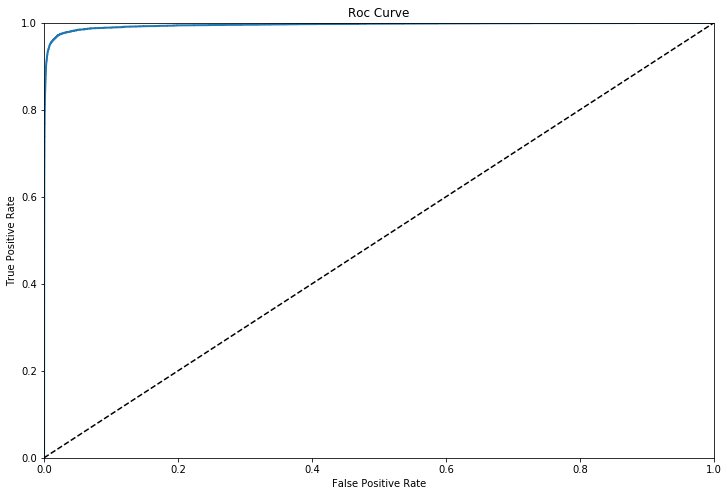

In [109]:
plt.figure(figsize=(12,8))
plot_roc_curve(fpr,tpr)

In [110]:
from sklearn.metrics import roc_auc_score

In [111]:
roc_auc_score(y_train_0,y_scores)

0.9950673789727569

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives


In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

# Model Comparison

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
f_clf = RandomForestClassifier(random_state=0)

In [115]:
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0,
                                   cv=3, method='predict_proba')

In [116]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

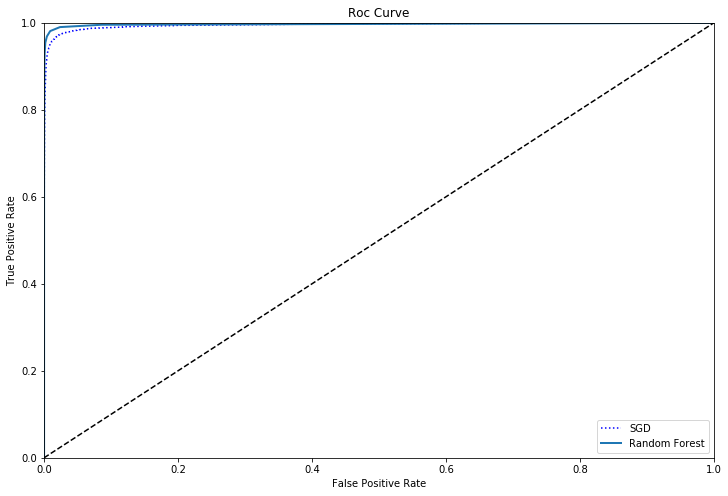

In [117]:
plt.figure(figsize=(12,8)); 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show();

In [118]:
roc_auc_score(y_train_0, y_scores_forest)

0.9970310654790051

In [119]:
f_clf.fit(X_train, y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [120]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [121]:
precision_score(y_train_0, y_train_rf) 

0.9918962722852512

In [122]:
recall_score(y_train_0, y_train_rf) 

0.9299341549890259

In [123]:
confusion_matrix(y_train_0, y_train_rf)

array([[54032,    45],
       [  415,  5508]], dtype=int64)

## TRAINING MODEL ON WHOLE DATASET

In [130]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.naive_bayes import MultinomialNB

In [132]:
NB = MultinomialNB()

In [139]:
NB.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [140]:
y_pred = NB.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_test,y_pred)

0.8279285714285715

In [144]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
accuracy = cross_val_score(NB, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)
 
Accuracy of Random Forests is:  95.3333333333